## Loan Prediction model to predict if a customer is suitable to be granted loan or not based on various parameters.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# making copies of the data (incase changes are made to original)
train= pd.read_csv(r"D:\Users\Srivastava\Downloads\loan_train.csv")
test= pd.read_csv(r"D:\Users\Srivastava\Downloads\loan_test.csv")
train_original=train.copy()
test_original=test.copy()

### Exploring Data

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape,test.shape

((614, 13), (367, 12))

#### We will perform univariate analysis. We will examine each variable individually.
#### For categorical features(objects) we will will frequency tables,bar plots to visualize the data
#### For numerical features, probabaility density plots can be used to look at the distribution of the variable.

In [8]:
# frequency table of each variable will give us the count of each category in that variable

train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Normalizing the values to print percentage 
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

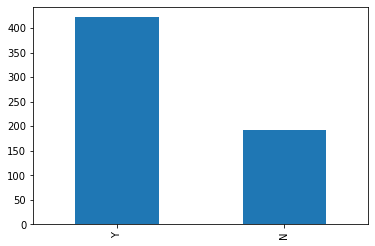

In [10]:
train["Loan_Status"].value_counts().plot.bar()

#### Categorical Features: These features have categories(Gender,Married,Loan_Status,Self_Employed,Credit_History)

#### Ordinal Features: Variables in categorical features having some order involved(Dependents,Education,Property_Area)

#### Numerical Features: These features have numerical values(ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term)

Visualizing Categorical Variables

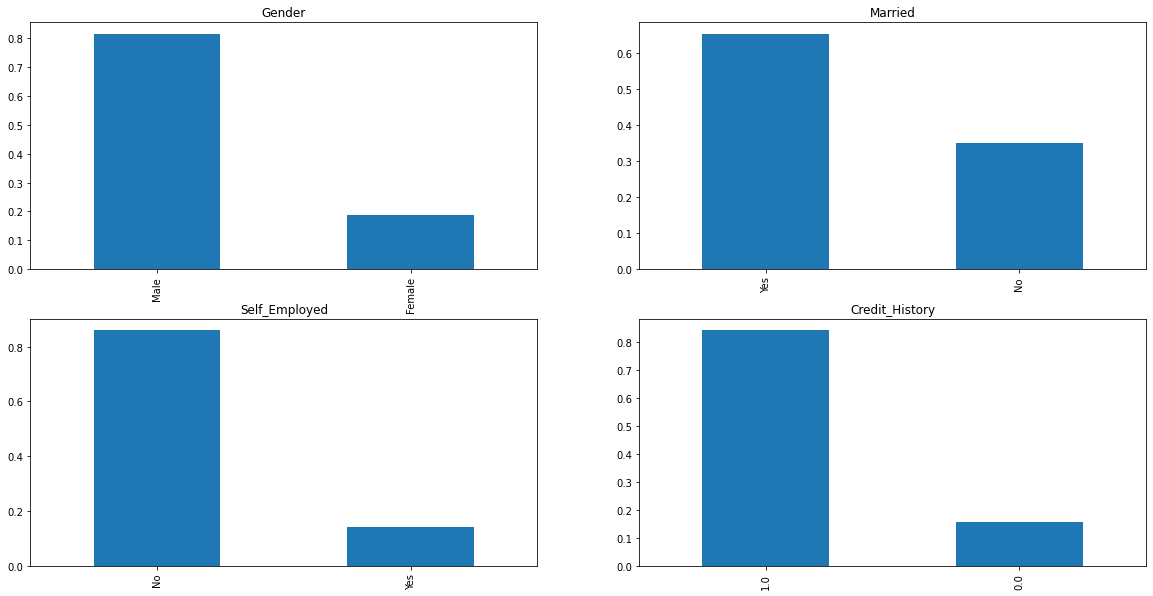

In [11]:
plt.figure(1) 

plt.subplot(221)

train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")

plt.subplot(222)

train["Married"].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)

train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")

plt.subplot(224)

train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.show()

Visualizing Ordinal Variable

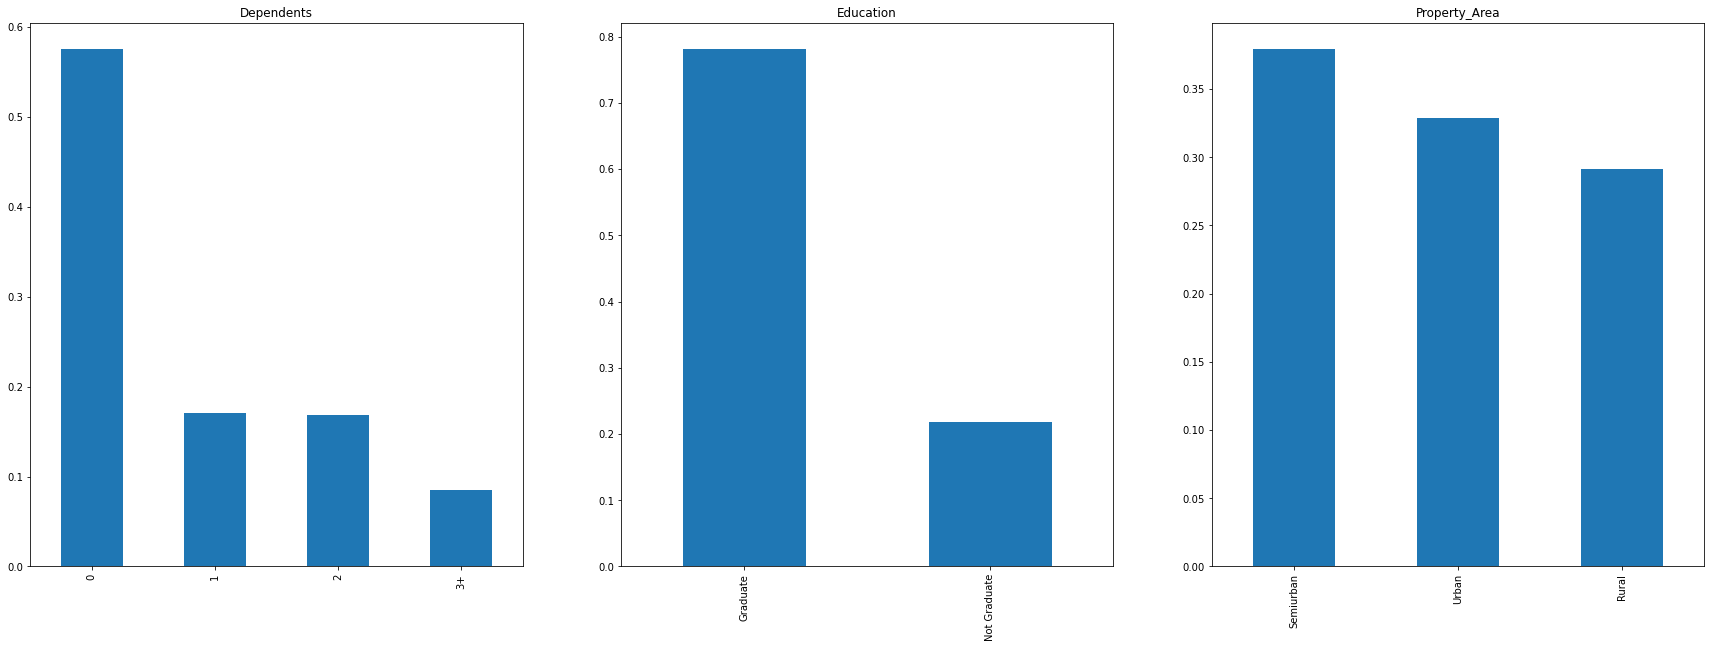

In [12]:
plt.figure(1) 

plt.subplot(131)

train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(30,10), title="Dependents")

plt.subplot(132)

train["Education"].value_counts(normalize=True).plot.bar(title="Education")

plt.subplot(133)

train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

plt.show()

Visualizing Numerical Variable

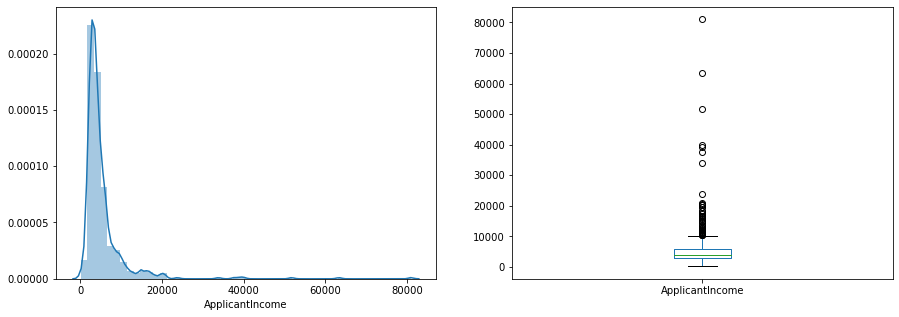

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"])
plt.subplot(122) 
train["ApplicantIncome"].plot.box(figsize=(15,5))
plt.show()


The boxplot confirms the presence of a lot of outliers. This can be attributed to the income disparity in the society. 
Let us segregate the people by Education.

Text(0.5, 0.98, '')

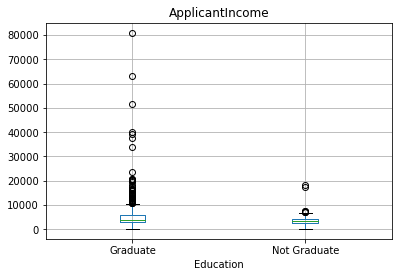

In [14]:
train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle("")

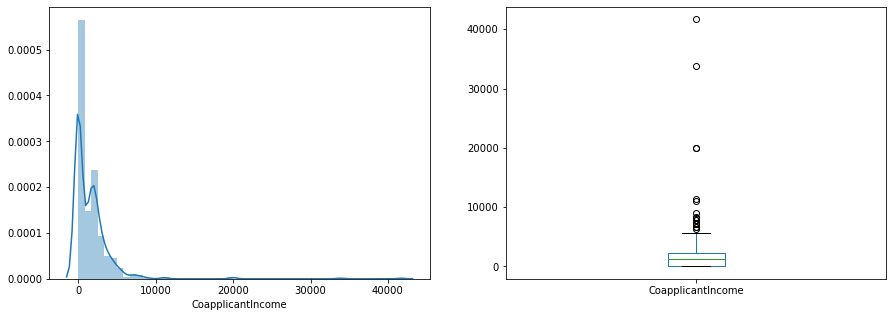

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])
plt.subplot(122) 
train["CoapplicantIncome"].plot.box(figsize=(15,5))
plt.show()

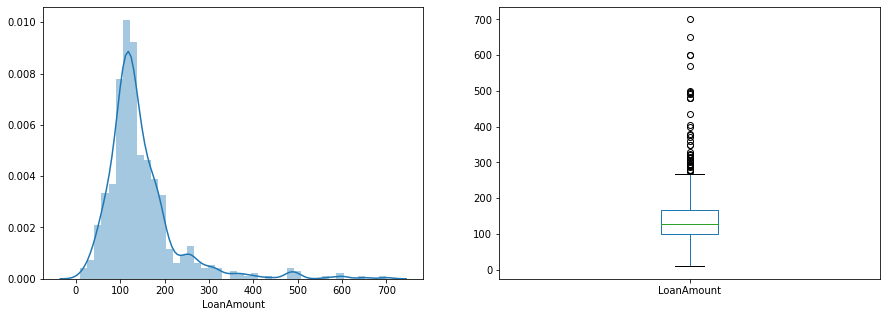

In [16]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train["LoanAmount"])
plt.subplot(122) 
train["LoanAmount"].plot.box(figsize=(15,5))
plt.show()

### Bivariate Analysis

Categorical variable vs Target Variable

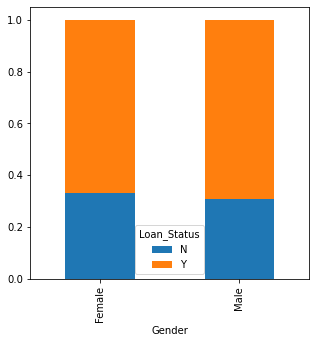

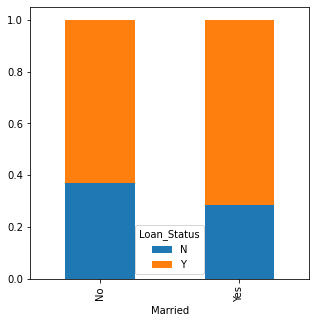

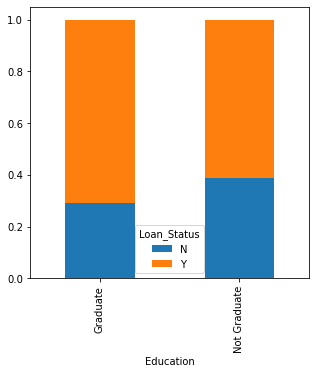

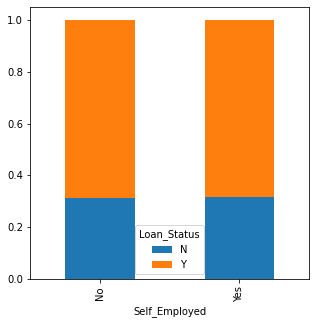

In [17]:
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Education=pd.crosstab(train["Education"],train["Loan_Status"])
Self_Employed=pd.crosstab(train["Self_Employed"],train["Loan_Status"])


Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))


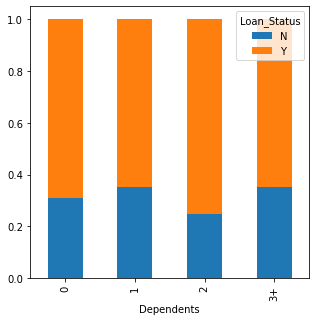

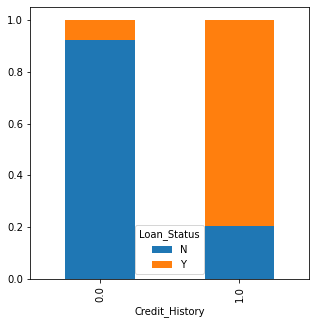

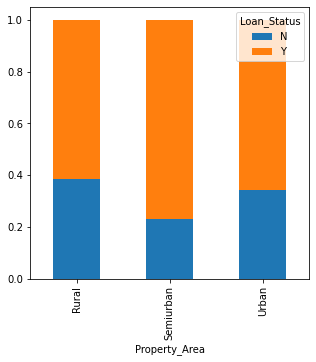

In [18]:
Dependents=pd.crosstab(train["Dependents"],train["Loan_Status"])
Credit_History=pd.crosstab(train["Credit_History"],train["Loan_Status"])
Property_Area=pd.crosstab(train["Property_Area"],train["Loan_Status"])


Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

Numerical Independent Variable vs Target Variable

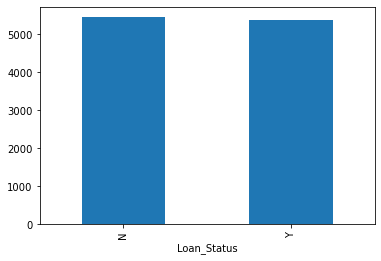

In [19]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

Text(0, 0.5, 'Percentage')

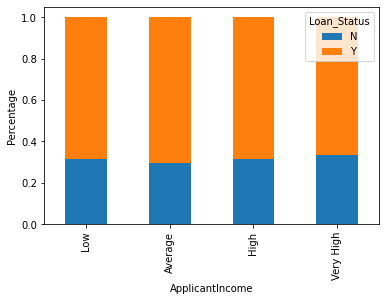

In [20]:
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very High"]
train["Income_bin"] = pd.cut(train["ApplicantIncome"],bins,labels=group)

Income_bin =pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("ApplicantIncome") 
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

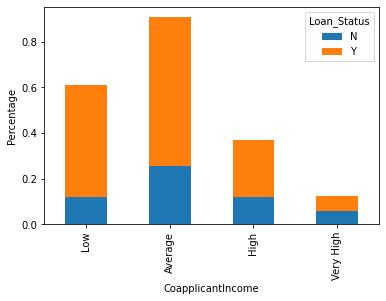

In [21]:
bins=[0,1500,3500,6500,50000]
group=["Low","Average","High","Very High"]
train["Coapplicant_Income_bin"] = pd.cut(train["CoapplicantIncome"],bins,labels=group)

Coapplicant_Income_bin =pd.crosstab(train["Coapplicant_Income_bin"],train["Loan_Status"])
Coapplicant_Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome") 
plt.ylabel("Percentage")

Combining Applicant and Co applicant income

Text(0, 0.5, 'Percentage')

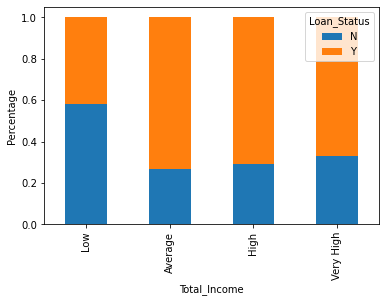

In [22]:
train["Total_Income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

bins=[0,2500,4000,6000,81000]

group=["Low","Average","High","Very High"]

train["Total_Income_bin"] = pd.cut(train["Total_Income"],bins,labels=group)

Total_Income_bin =pd.crosstab(train["Total_Income_bin"],train["Loan_Status"])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.xlabel("Total_Income") 
plt.ylabel("Percentage")

Visualizing loan amount Variable

Text(0, 0.5, 'Percentage')

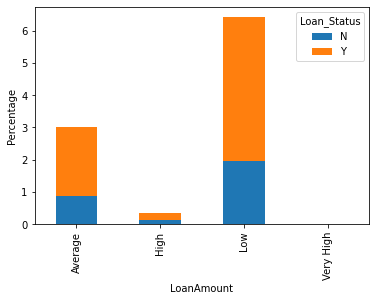

In [23]:
bins=[0,100,200,700] 
group=["Low","Average","High"]
train["LoanAmount_bin"] = pd.cut(train["LoanAmount"],bins,labels=group)

LoanAmount_bin =pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("LoanAmount") 
plt.ylabel("Percentage")

In [24]:
train=train.drop(["Income_bin","Coapplicant_Income_bin","LoanAmount_bin","Total_Income_bin","Total_Income"],axis=1)
train["Dependents"].replace("3+",3,inplace=True)
test["Dependents"].replace("3+",3,inplace=True)
train["Loan_Status"].replace('N',0,inplace=True)
train["Loan_Status"].replace('Y',1,inplace=True)

Creating a Correlation Matrix

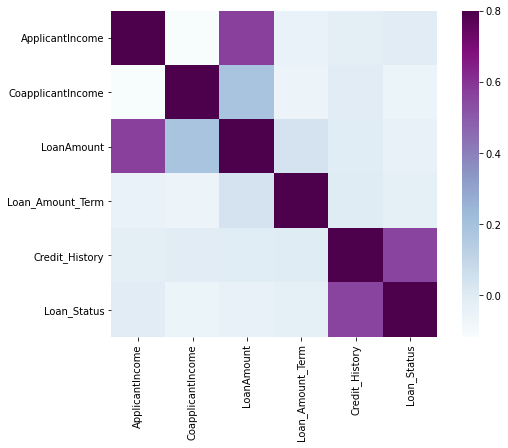

In [25]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

### Data Cleaning

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [28]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [30]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [31]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
test["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
test["Married"].fillna(train["Married"].mode()[0],inplace=True)
test["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [33]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [34]:
test["LoanAmount"].fillna(test["LoanAmount"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].mode()[0],inplace=True)

In [35]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Removing Skewness due to outliers by log transformation

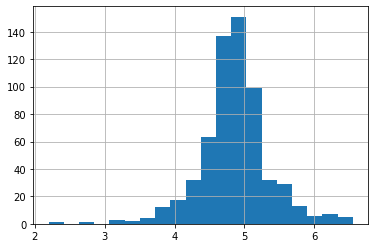

In [36]:
# to get a normal distribution
train["LoanAmount_log"]=np.log(train["LoanAmount"])
train["LoanAmount_log"].hist(bins=20)
test["LoanAmount_log"]=np.log(test["LoanAmount"])

### Logistic Regression

In [37]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [38]:
X=train.drop("Loan_Status",1)
y=train.Loan_Status

Making Dummy Variables for categorical variables

In [39]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Training the model

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class="ovr",n_jobs=1,penalty="l2",random_state=1,solver="liblinear",tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [42]:
pred_cv=model.predict(x_cv)

In [43]:
accuracy_score(y_cv,pred_cv)

0.8324324324324325

In [44]:
pred_test=model.predict(test)
submission=pd.read_csv(r"D:\Users\Srivastava\Downloads\loan_sample_submission.csv")

In [45]:
submission["Loan_Status"]=pred_test
submission["Loan_ID"]=test_original["Loan_ID"]

In [46]:
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)

In [47]:
pd.DataFrame(submission,columns=["Loan_ID","Loan_Status"]).to_csv("logistic.csv")

### Logistic Regressioon using stratified k-fold cross validation

In [48]:
from sklearn.model_selection import StratifiedKFold

In [49]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score 0.8048780487804879

2 of kfold 5
accuracy score 0.8373983739837398

3 of kfold 5
accuracy score 0.7804878048780488

4 of kfold 5
accuracy score 0.7886178861788617

5 of kfold 5
accuracy score 0.7950819672131147


ROC Curve

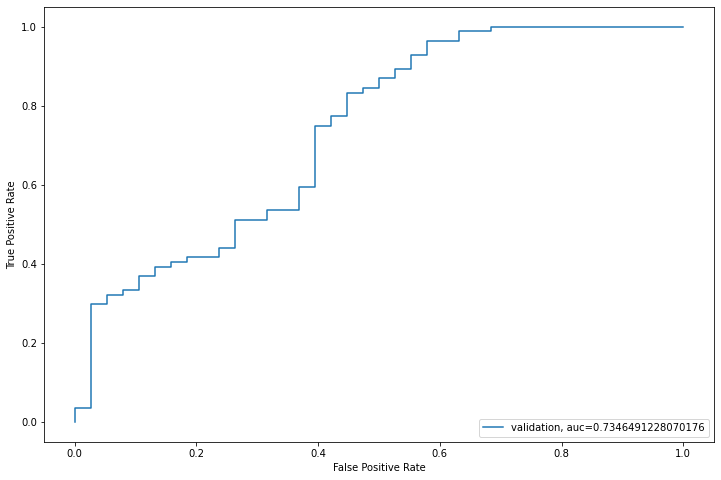

In [50]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,pred) 
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc=" +str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [51]:
submission["Loan_Status"] = pred_test 
submission["Loan_ID"]= test_original["Loan_ID"]
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)

In [52]:
pd.DataFrame(submission,columns=["Loan_ID","Loan_Status"]).to_csv("Logistic.csv")

We will create 3 new features:
Total Income, EMI,Balance Income

In [53]:
train["Total_Income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
test["Total_Income"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

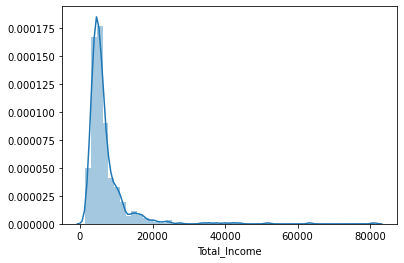

In [54]:
sns.distplot(train["Total_Income"])

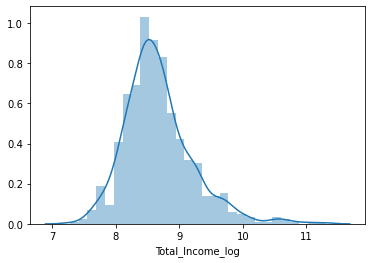

In [55]:
train["Total_Income_log"]=np.log(train["Total_Income"])
sns.distplot(train["Total_Income_log"])
test["Total_Income_log"]=np.log(test["Total_Income"])

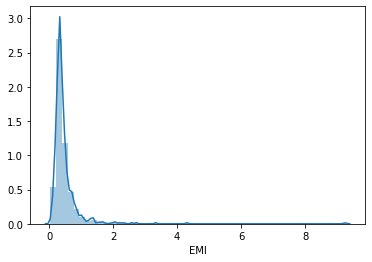

In [56]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]
sns.distplot(train["EMI"])

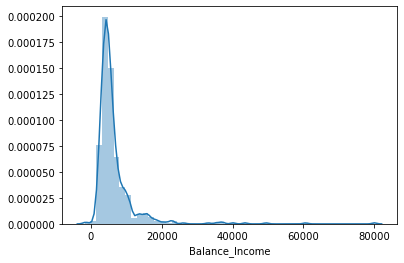

In [57]:
train["Balance_Income"]=train["Total_Income"]-(train["EMI"]*1000) # multiply with 1000 to make units equal
test["Balance_Income"]=test["Total_Income"]-(test["EMI"]*1000)
sns.distplot(train["Balance_Income"])

In [58]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
test=test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [59]:
X=train.drop("Loan_Status",1)
y=train.Loan_Status

In [60]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score 0.7886178861788617

2 of kfold 5
accuracy score 0.6910569105691057

3 of kfold 5
accuracy score 0.6666666666666666

4 of kfold 5
accuracy score 0.7804878048780488

5 of kfold 5
accuracy score 0.680327868852459


In [62]:
submission["Loan_Status"]=pred_test
submission["Loan_ID"]=test_original["Loan_ID"]
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)
pd.DataFrame(submission,columns=["Loan_ID","Loan_Status"]).to_csv("Log2.csv")

Decision Tree

In [63]:
from sklearn import tree
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score 0.7398373983739838

2 of kfold 5
accuracy score 0.6991869918699187

3 of kfold 5
accuracy score 0.7560975609756098

4 of kfold 5
accuracy score 0.7073170731707317

5 of kfold 5
accuracy score 0.6721311475409836


In [65]:
submission["Loan_Status"]=pred_test
submission["Loan_ID"]=test_original["Loan_ID"]
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)
pd.DataFrame(submission,columns=["Loan_ID","Loan_Status"]).to_csv("DecisionTree.csv")

Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred2=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score 0.8292682926829268

2 of kfold 5
accuracy score 0.7886178861788617

3 of kfold 5
accuracy score 0.8048780487804879

4 of kfold 5
accuracy score 0.8048780487804879

5 of kfold 5
accuracy score 0.7540983606557377


We will improve the accuracy by tuning the hyperparamters for this model. We will use grid search to get optimized values of hyper parameters.

We will tune max_depth and n_estimators parameters

In [76]:
submission["Loan_Status"]=pred_test
submission["Loan_ID"]=test_original["Loan_ID"]

submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)

pd.DataFrame(submission,columns=["Loan_ID","Loan_Status"]).to_csv("Random Forest.csv")

Feature engineering to predict target variable

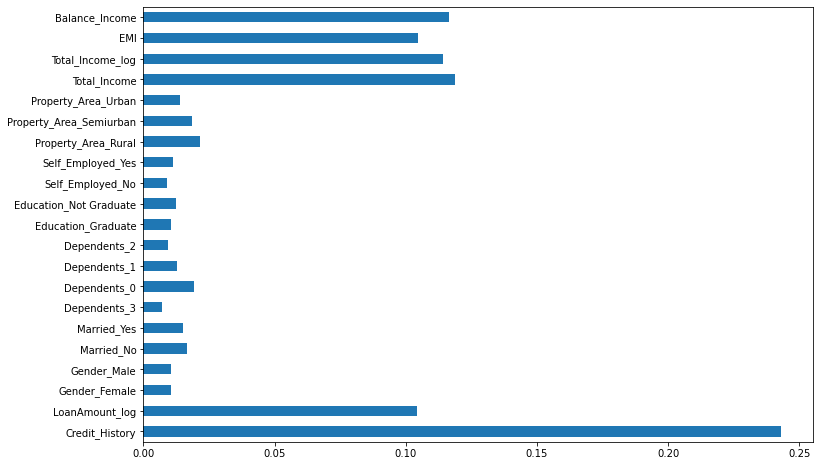

In [78]:
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind="barh",figsize=(12,8))

XGBOOST

In [86]:
from xgboost import XGBClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=XGBClassifier(n_estimator=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy score",score)
    i+=1
    pred_test=model.predict(test)
    pred3=model.predict_proba(xvl)[:,1]


1 of kfold 5
[22:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score 0.7642276422764228

2 of kfold 5
[22:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but


#### Best accuracy was obtained by Logistic Regression followed by random forest